<a href="https://colab.research.google.com/github/pherathm/DATA110/blob/main/Week5_Piushani_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


###Part 1: Understanding the Dataset
####Task 1: Dataset Overview

Briefly describe the Titanic dataset. What kind of information is contained in each column?
Deliverable: Write a paragraph summarizing the dataset based on your exploration.

####Answer:

The Titanic dataset includes various categories of information about the passengers on board. These categories include:

* survived: Indicates if the passenger survived (1) or did not survive (0).
* pclass: Refers to the passenger's class (1st, 2nd, or 3rd).
* sex: The gender of the passenger.
* age: The age of the passenger.
* sibsp: The number of siblings or spouses the passenger had aboard.
* parch: The number of parents or children the passenger had aboard.
* fare: The fare paid by the passenger for the journey.
* embarked: The port where the passenger boarded the Titanic (C for Cherbourg, Q for Queenstown, S for Southampton).





###Part 2: Fare and Survival Analysis
####Task 2: Fare Distribution

Plot a histogram and KDE for the distribution of fares paid by passengers.



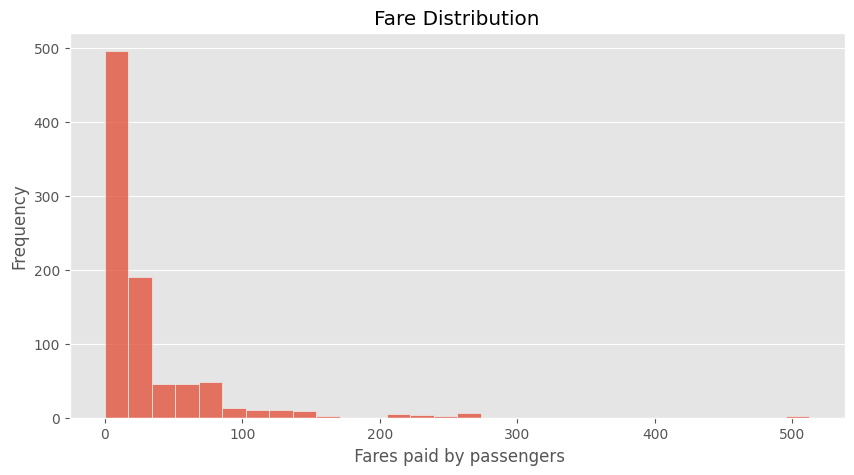

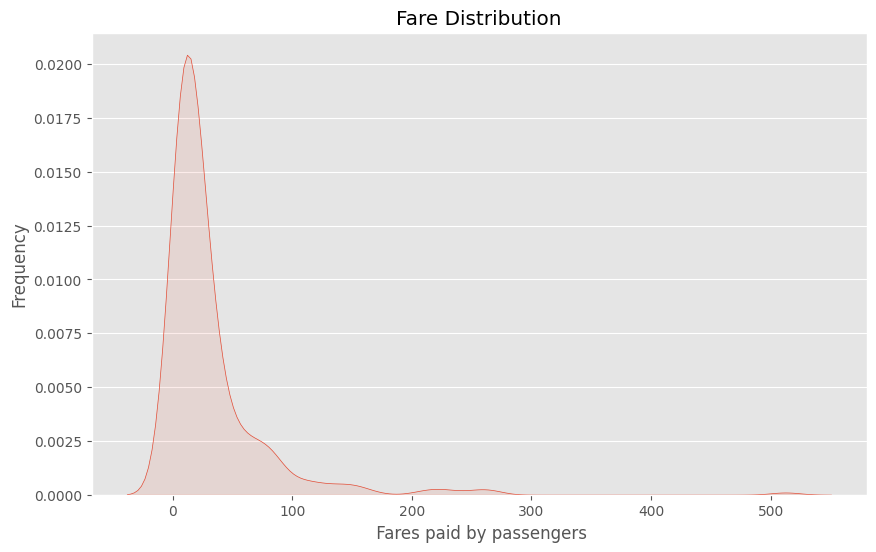

In [3]:
# histogram for fare
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.histplot(titanic['fare'], bins=30)
plt.title('Fare Distribution')
plt.xlabel(' Fares paid by passengers')
plt.ylabel('Frequency')
plt.grid(axis='x')
plt.show()

# KDE for fare
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.kdeplot(titanic['fare'], fill=True, alpha=0.1)
plt.title('Fare Distribution')
plt.xlabel(' Fares paid by passengers')
plt.ylabel('Frequency')
plt.grid(axis='x')
plt.show()

####Question: What trends or outliers do you observe in the fare distribution? How might fare impact survival rates?

In the fare distribution, most passengers paid law fares, showing many were likely from lower classes, like third-class passengers. A few paid very high fares, likely first-class passengers. Those who paid more seemed more likely to survive, suggesting wealthier passengers had better access to lifeboats and safer areas. This shows the social inequality on the Titanic, where first-class passengers had a better chance of surviving than those in lower classes.

#####Task 3: Fare and Survival Rates

Create a KDE plot to compare the fare distributions for survivors and non-survivors.


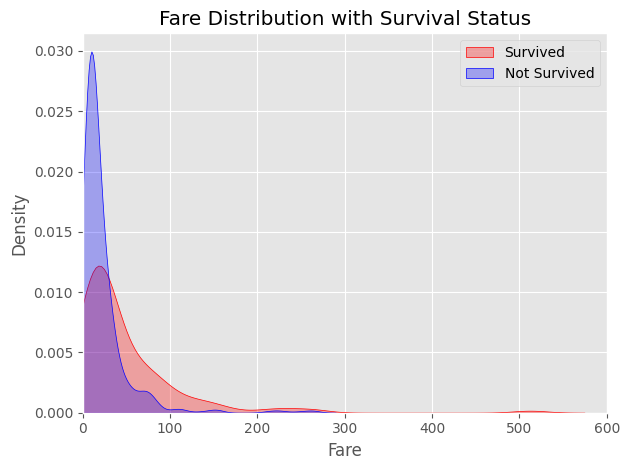

In [50]:

# KDE plot for survivors
sns.kdeplot(titanic[titanic['survived'] == 1]['fare'], color='red', alpha=0.3, label='Survived', fill = True)

# KDE plot for non-survivors
sns.kdeplot(titanic[titanic['survived'] == 0]['fare'], color='blue', alpha=0.3, label='Not Survived', fill =True)

plt.title('Fare Distribution with Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.xlim(0, 600)
plt.ylim(0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Question: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

Answer:

The KDE plot shows that Titanic survivors generally paid higher fares, indicating a link between fare and survival rates. Wealthy passengers had better access to lifeboats and safety, while those who didn't survive, especially with lower fares, were likely third-class passengers who had trouble escaping. This shows how socioeconomic status greatly impacted survival chances, benefiting wealthier individuals.



###Part 3: Class, Fare, and Survival Insights
Task 4: Passenger Class, Fare, and Survival

Create histograms and KDE plots to compare fare distributions across different passenger classes (Pclass) and analyze survival rates for each class.


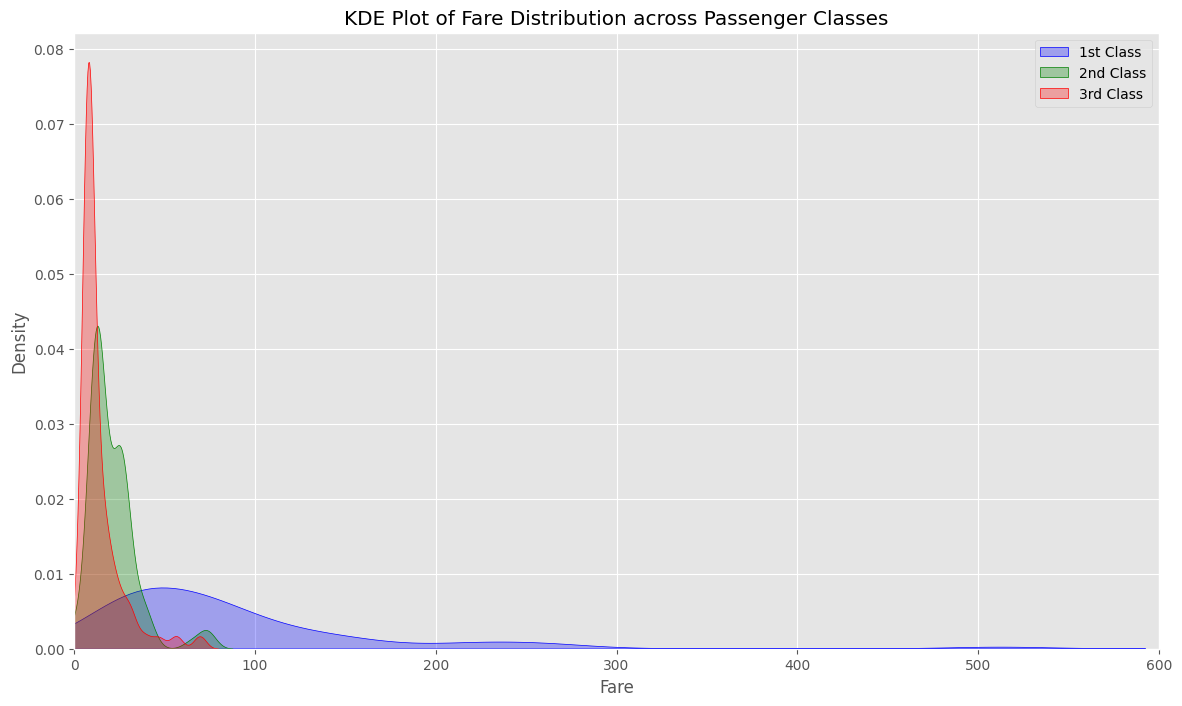

<ipython-input-60-92d477055cc9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic, palette='dark')


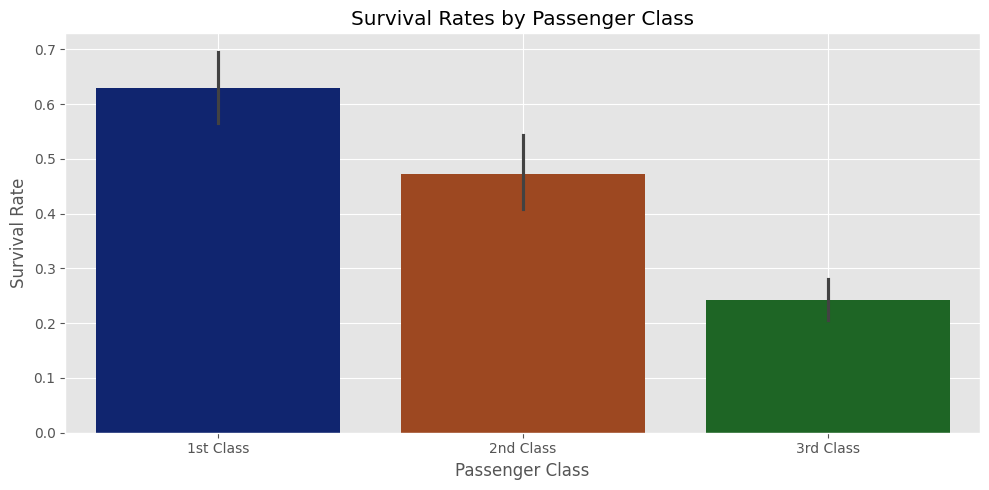

In [60]:
# KDE plots for each class with custom colors - fare distributions
plt.figure(figsize=(14, 8))
sns.kdeplot(titanic[titanic['pclass'] == 1]['fare'], color='blue', label='1st Class', fill=True, alpha = 0.3)
sns.kdeplot(titanic[titanic['pclass'] == 2]['fare'], color='green', label='2nd Class', fill=True, alpha = 0.3)
sns.kdeplot(titanic[titanic['pclass'] == 3]['fare'], color='red', label='3rd Class', fill=True, alpha = 0.3)
plt.title('KDE Plot of Fare Distribution across Passenger Classes')
plt.xlabel('Fare')
plt.xlim(0, 600)
plt.ylabel('Density')
plt.legend()
plt.show()




# Bar plot for the passenger class and the survival rate

plt.figure(figsize=(10, 5))
sns.barplot(x='pclass', y='survived', data=titanic, palette='dark')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.grid(True)
plt.tight_layout()
plt.show()




###Question: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?

Fare Distribution

First-class passengers paid higher fares, showing their wealth and access to better living conditions. Second-class fares were moderate, indicating a middle-class status, while third-class fares were much lower, reflecting the financial struggles many in that group faced.



Survival Rates

First-class passengers had much higher survival rates because they were closer to lifeboats and had better access to safety. In contrast, third-class passengers had much lower survival rates, mainly because they were on lower decks, which made it harder to escape. Second-class passengers had survival rates in between, benefiting somewhat compared to third-class but not as much as first-class passengers.

Overall, the findings show that socioeconomic status impacted experiences on the Titanic. Wealthier people had a better chance of survival, while third-class passengers faced many challenges.

##Part 4: Age and Survival
####Task 5: Age of Survivors and Non-Survivors

Create KDE plots to compare the age distributions of survivors and non-survivors.


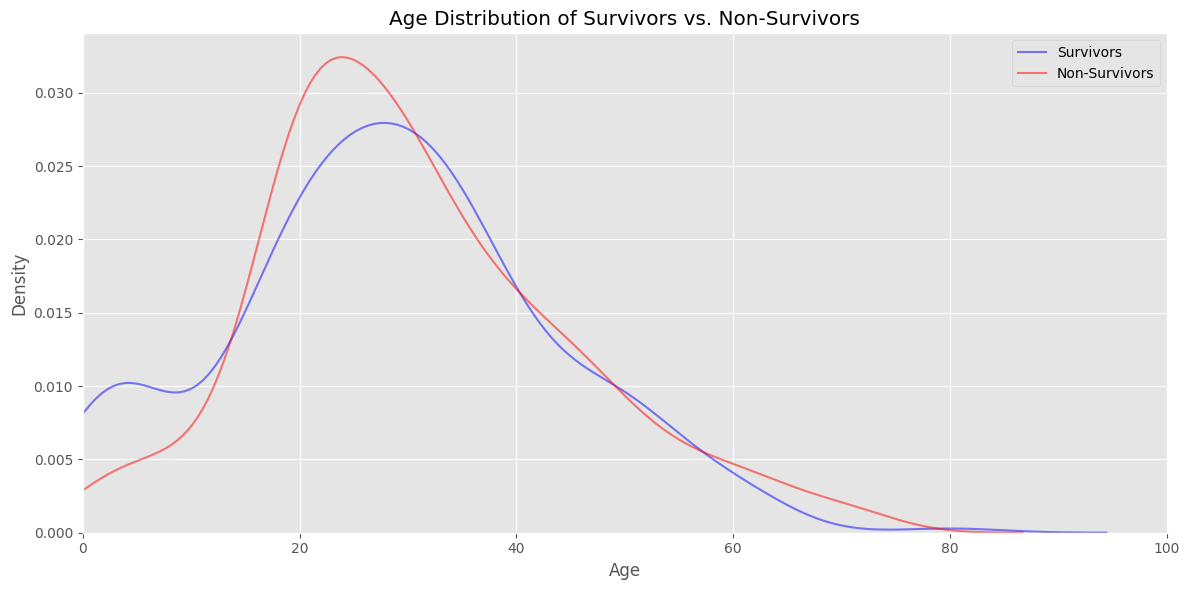

In [54]:
plt.figure(figsize=(12, 6))

# KDE Plot for survivors
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], color='blue', alpha=0.5, label='Survivors')

# KDE Plot for non-survivors
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], color='red', alpha=0.5, label='Non-Survivors')

plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

####Question: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?

Answer

Survivors were generally younger, especially young adults, with many in the 20-30 age range. This suggests that younger people had a better chance of surviving. On the other hand, non-survivors had a wider range of ages, with fewer young people and more older adults, indicating they were less likely to survive. This shows that age played a big role in survival.Childern might have priority on the lifeboats as well.


####Task 6: Pyramid Histogram for Age Survival by Sex

Create a pyramid-style histogram (also known as a population pyramid) for age, showing survival data split by sex. If possible, attempt to find or create one.


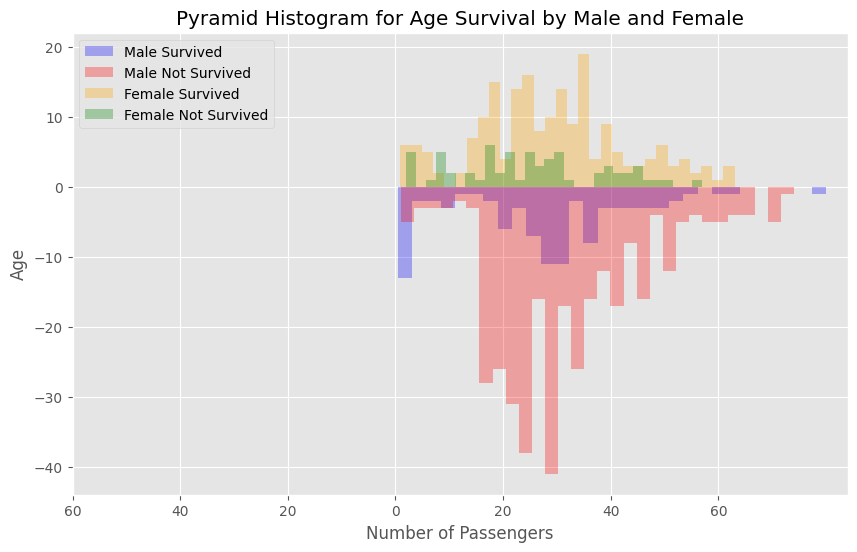

In [59]:
ages_male_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age']
ages_male_not_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 0)]['age']
ages_female_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age']
ages_female_not_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)]['age']


plt.figure(figsize=(10, 6))
plt.hist(ages_male_survived, bins=30, label='Male Survived', alpha=0.3, color='blue', weights=[-1] * len(ages_male_survived))
plt.hist(ages_male_not_survived, bins=30, label='Male Not Survived', alpha=0.3, color='red', weights=[-1] * len(ages_male_not_survived))
plt.hist(ages_female_survived, bins=30, label='Female Survived', alpha=0.3, color='orange')
plt.hist(ages_female_not_survived, bins=30, label='Female Not Survived', alpha=0.3, color='green')

plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Pyramid Histogram for Age Survival by Male and Female')

plt.xticks([-60, -40, -20, 0, 20, 40, 60], [60, 40, 20, 0, 20, 40, 60])
plt.legend(loc='upper left')
plt.show()

###Question: What can you infer from the age and sex distribution in relation to survival rates?

Answer:

The age and sex distribution shows that childern and younger passengers, had higher survival rates. Females generally survived at higher rates than males.Older adults faced lower survival rates, likely due to mobility issues and less access to lifeboats.



###Optional Task: Exploring Additional Visualizations
Task 7 (Optional):

Bar Graph, Line Plot, and Scatter Plot


Create a bar graph, line plot, and scatter plot using the Titanic dataset.
Suggestions: You can explore variables like survival rates, passenger class, age, or fare in these plots.

1. Bar Graph : Survival rate by Passenger Class

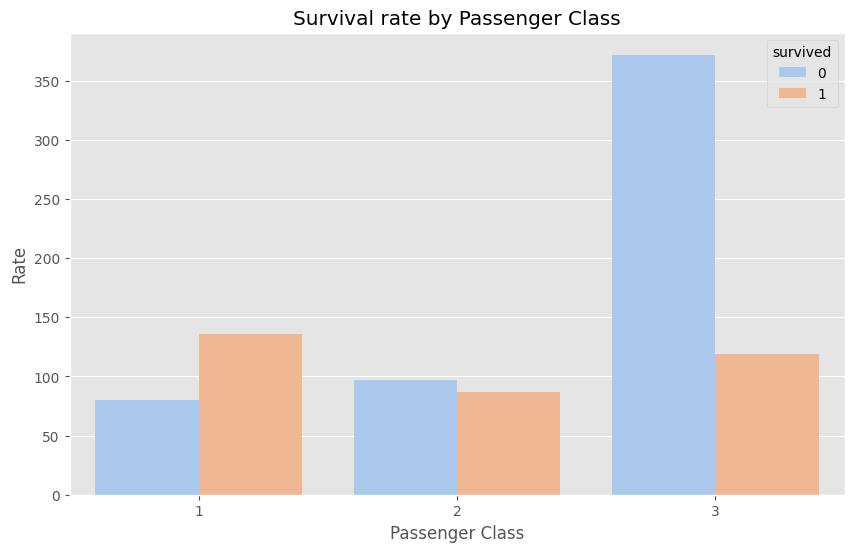

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='pclass', hue='survived', palette='pastel')
plt.title('Survival rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Rate')
plt.show()

2. Line Plot: Survival rate by Passenger Class

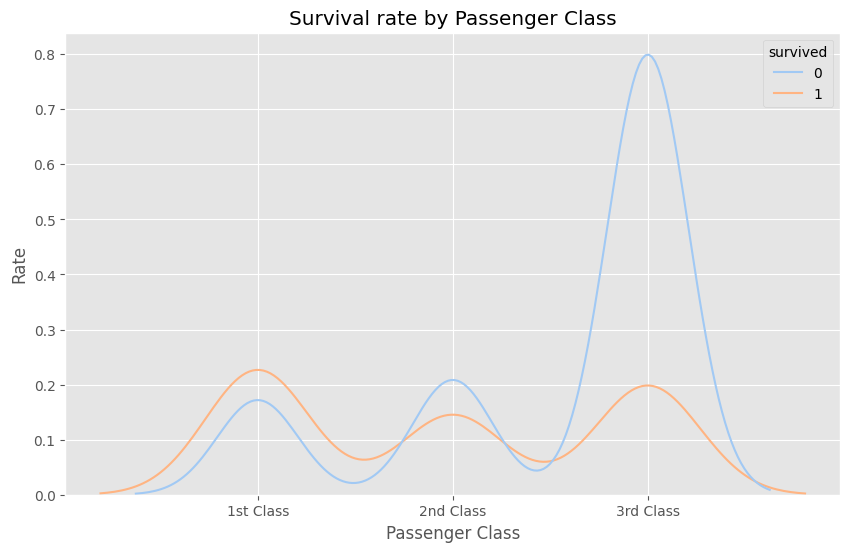

In [70]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic, x='pclass', hue='survived', palette='pastel')
plt.title('Survival rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.xticks(ticks=[1, 2, 3], labels=['1st Class', '2nd Class', '3rd Class'])
plt.ylabel('Rate')
plt.show()

3. Scatter Plot: Scatter Plot of Fare vs. Age Colored by Survival Status


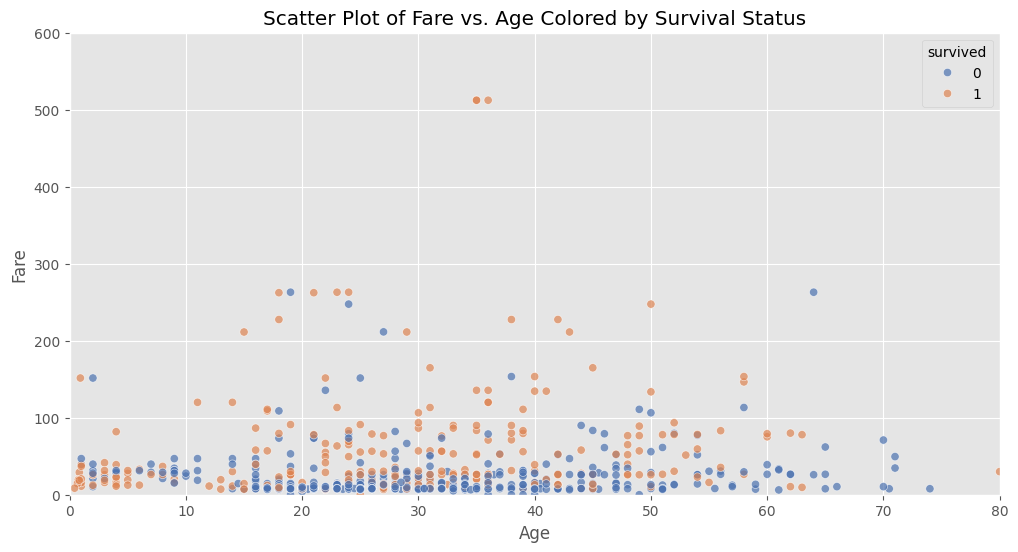

In [68]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', palette='deep', alpha=0.7)
plt.title('Scatter Plot of Fare vs. Age Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.xlim(0, 80)
plt.ylim(0, 600)
plt.grid(True)
plt.show()

####Question: What additional insights do these visualizations provide that weren't evident from the histograms and KDE plots?

Answer:

These visualizations give a clear understanding of the Titanic disaster, showing how class, age, and survival are connected. They build on the insights from histograms and KDE plots by showing relationships and trends in the data more clearly.